<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# The Bias-Variance Tradeoff

_Authors: Matt Brems, Dave Yerrington, Tim Book, Noelle Brown_

---


## Learning Objectives

- Describe error due to bias and error due to variance.
- Explain the difference between bias and variance and understand the tradeoff between the two.
- Understand what it means for a model to be underfit and to be overfit.
- Diagnose error due to bias and variance in models.

---
## How do we quantify error?

Whenever we're fitting models, we're going to run into problems.  Usually we run into problems related to **high bias**, or **high variance**.  In other words, we're talking about an **underfitting** or **overfitting** problem.  It's likely that you have a problem that entails something along the spectrum of **bias** and **variance** that could inform some strategy to improve our model(s) performance.

## Bias
- Underfitting
- How bad your model is at predicting $y$

<img src="../imgs/high_bias.png" style="height: 400px">

## Variance

- Overfitting
- How bad your model is at generalizing to new data

<img src="../imgs/high_variance.png" style="height: 400px">

### Cliffsnotes:

> **Bias** is how bad your model is at predicting $y$.

> **Variance** is how bad your model is at generalizing to new data.

Understanding the bias-variance tradeoff is important, because it helps you intuitively reason about how different models or metrics may affect your results.

---

### Example: Linear Regression
    
We often refer to linear regression as a model with _low variance_ and _high bias_. For example:

$$\hat{y} = \beta_0 + \beta_1x.$$


When trained on different subsets of the population, we observe that its estimated parameters typically have:

- **High bias**: Linear regression tends to _underfit_, since data is rarely linear.
- **Low variance**: A similar line is always fit.

For this reason, we often see an underfit -- the model is not complex enough to model the signal. 

<details><summary>QUESTION: How can we tell if a model is underfitting?</summary>
We know it is underfitting by observing a large training and test error.
</details>

---
### **Example: How Can We Reduce the High Bias?**
According to the bias-variance tradeoff, to reduce the bias (and make the fit better), we must increase the model variance (and make it more sensitive to noise).

#### Approach: Increase Variance by Adding More Parameters
Adding more parameters increases the "model complexity" -- and hence allows it more flexibility to fit the data (i.e. a lower bias).

For example, we could make it a higher-order polynomial model:

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3.$$

Or we could add additional features:

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3.$$


<details><summary>QUESTION: How does adding new parameters affect the bias and variance?</summary>
    
- **Increased variance**: There are now more ways to fit the model. 
- **Decreased bias**: More ways to fit the model means it can fit better.

</details>


<details><summary>QUESTION: Will adding new features most likely increase, decrease, or have no effect on the SSE?</summary>

Adding additional parameters (or features) will nearly always decrease the SSE. Adding a new parameter gives you another knob to turn -- that at the very least will result in the same error (i.e. when the parameter is zero).
    
However, this does _not_ mean the new features are significant! In the case of linear regression, this is why Adjusted $R^2$ is used to compare models that have different numbers of features.
    
</details>

---

### Briefly:  SSE

## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

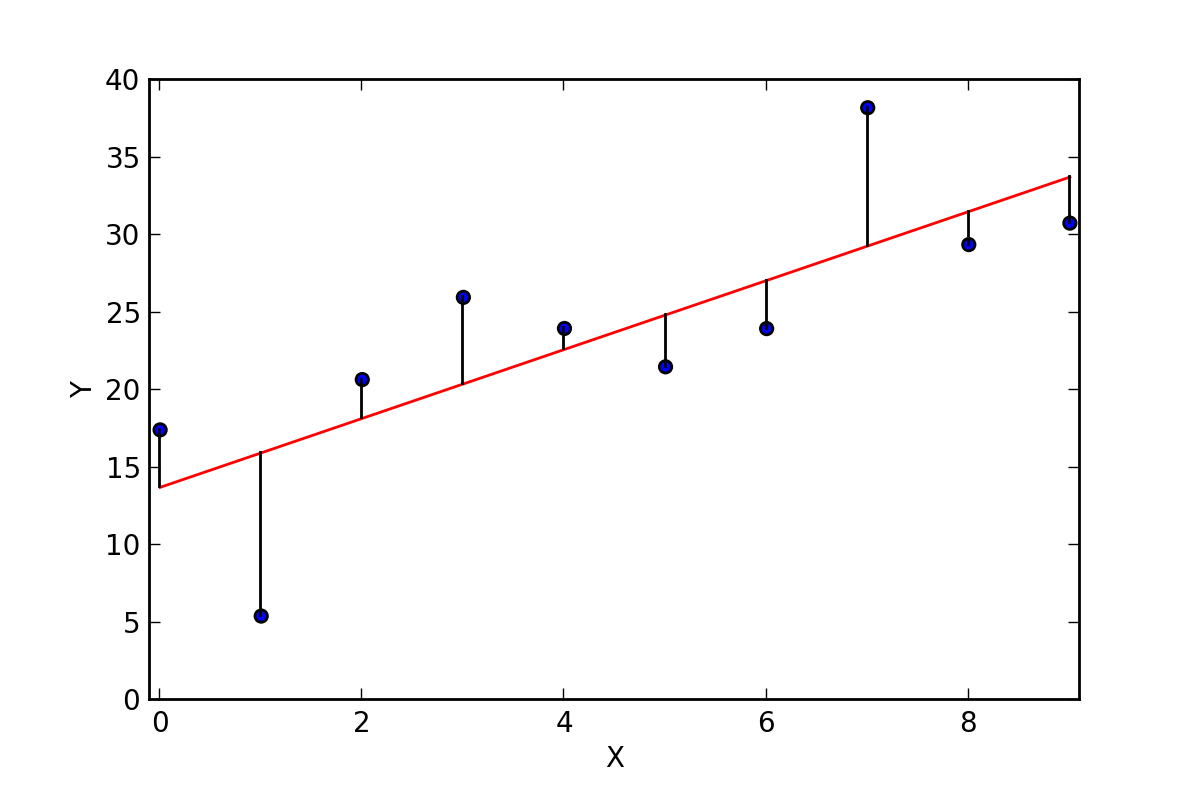


### Decomposing error, $E[SSE]$

The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance** 
> $E[\hat{y} - E[\hat{y}]]^2$
>
> How much do predictions differ. 
1. **$\sigma^2$** - Irreducible Error

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.

### Suppose we want to build a model to best predict $y$ using $X$.

#### Bias:  The average difference between our model $\hat{y}$ and the truth $y$.

- No bias: On average, our predictions are correct.
- As bias increases, our predictions, on average, get more and more incorrect.
- High bias: Low accuracy -> underfit

#### Variance: The amount of variation in our model.

- No variance: Our predictions consistently hit the same value.
- As variance increases, our predictions get more and more spread out.
- High variance: high accuracy -> overfit

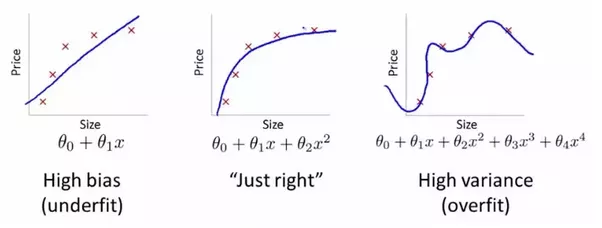

Notice in the figure above:
- *High variance*: We are modeling the noise -- not the data.
- *High bias*: We are missing the signal, because our model is not complex enough to represent it!

### Activity:  Underfit or Overfit

### Scenario A

<details><summary>Suppose we try to model commute time, given only the number of Metro stops per ride.

Which characteristics are likely?
    
- Bias (high / low)
- Variance (high / low)
- Accuracy (high / low)
- Underfit (likely / unlikely)
- Overfit (likely / unlikely)
    
</summary>
    
Since we are only including the number of metro stops in the model, this is likely to have high bias, low variance, low accuracy, and be underfit.
    
</details>

### Scenario B

<details><summary>Suppose we try to model commute time with Metro stops, cups of coffee you had today, the number of miles you live from GA, sock color, shoe size, average walking speed, and if you've seen a PT cruiser (limited edition) today or not.

Which characteristics are likely?
    
 - Bias (high / low)
- Variance (high / low)
- Accuracy (high / low)
- Underfit (likely / unlikely)
- Overfit (likely / unlikely)
    
</summary>
    
Since we are only including lots of noise in the model, this is likely to have low bias, high variance, high accuracy, and be overfit.
    
</details>

In [1]:
import pandas as pd
import numpy as np
data = {'stops' : [3, 8, 10, 15, 3],
       'coffee' : [1, 3, 2, 5, 1],
       'miles' : [8, 8, 8, 8, 8],
       'sock_color' : ['red', 'white', 'black', 'pineapple', 'red'],
       'commute_time' : [35, 40, 42, 50, 35]}
new_cols = ['stops', 'coffee', 'miles', 'sock_color', 'commute_time']
commute = pd.DataFrame(data, columns=new_cols)
commute

,stops,coffee,miles,sock_color,commute_time
0,3,1,8,red,35
1,8,3,8,white,40
2,10,2,8,black,42
3,15,5,8,pineapple,50
4,3,1,8,red,35


## Why Does Bias Occur?

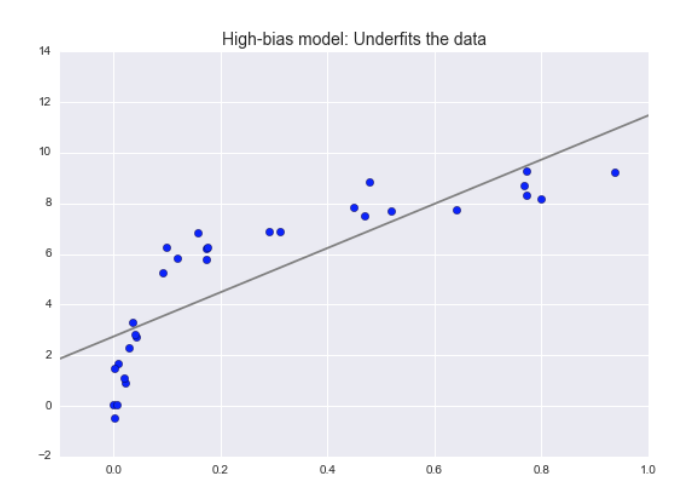

Basically, more bias points us to believe our model is too simple.

- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line.
- When we rely on simplifying assumptions that aren’t valid (i.e. linearity), we can run into high bias.
 - Linear regression is an method where we might suffer from high bias.

## Why Does Variance Occur?

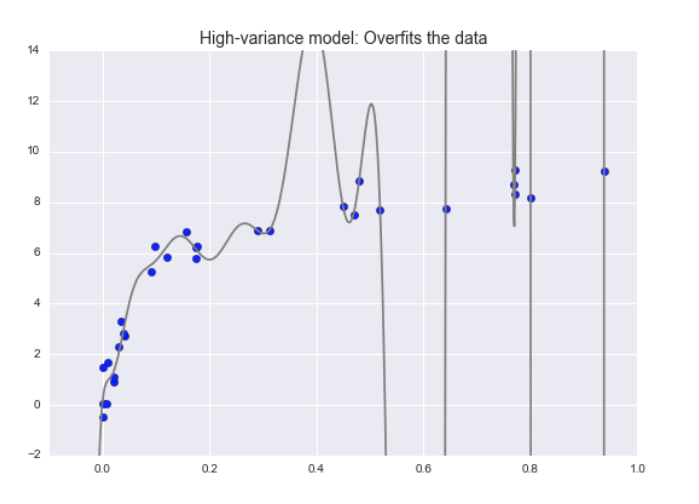

Basically, more variance points us to believe our model is too complex.

- Our model $\hat{y}$ matches our data too closely.
- May not perform well on data it hasn't seen yet.
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't.

## Signal and Noise - what are we modeling?
![](../imgs/signal-noise.jpg)

If there is a relationship between $X$ and $y$, we are seeking to discover it. If we detect legitimate relationship between $X$ and $y$, this is the **signal**. All the other randomness is just **noise**. If we overfit our model, we end up **"modeling the noise"**. Sometimes what we do is referred to _"separating signal from noise"_.

## The Tradeoff

One goal of predictive modeling is to find the optimal "sweet spot" in which we minimize our error.  One common strategy that we'll learn tomorrow deals with **cross-validation**, which entails testing the accuracy of our model on unseen data, then evaluating if it's overfit or not (more on this tomorrow).  Ideally, we're trying to find the ideal balance of bias and variance that allows us to generalize well.

### Increasing Model Complexity
- Bias decreases
- Variance increases (the model is more squigly)

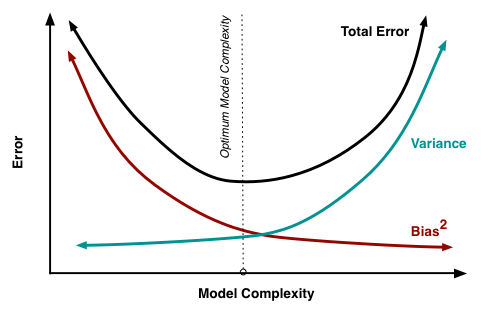

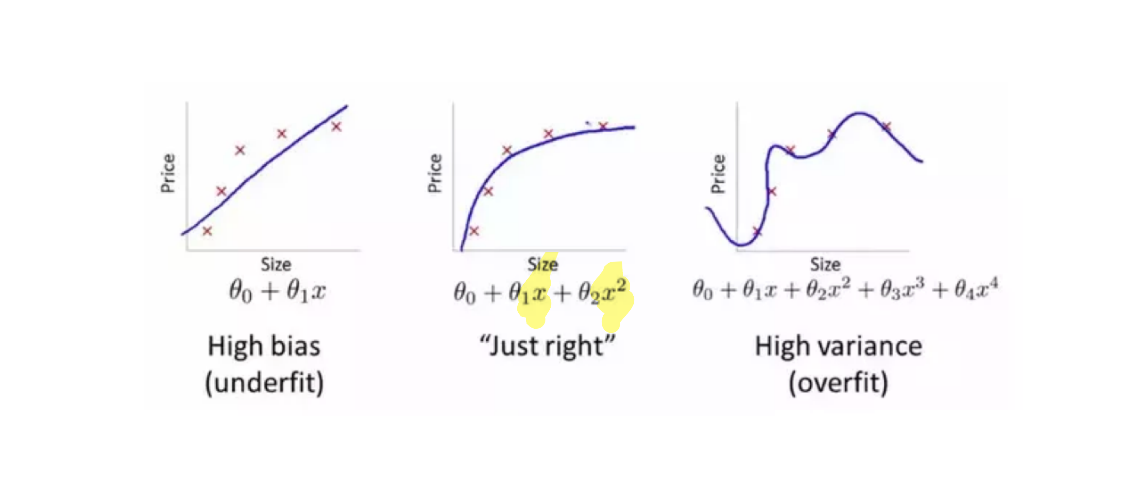

## So how can we fix it?

<details><summary>If your model has error due to high bias:
</summary>
    
- Get more data
- Get a better sample of data
- Increase complexity of model
    
</details>

<details><summary>If your model has error due to high variance:
</summary>
    
- Get more data
- Get a better sample of data
- Decrease complexity of model
- Regularize
    
</details>

The goal we typically have in mind with modeling is to **generalize** our estimations well.  Understanding the **bias** and **variance** tradeoff helps us understand **underfitting** and **overfitting**.

## Balanced Bias-Variance Tradeoff in the Streets, Overfitter in the (Jupyter Note)sheets

![](../imgs/car-view.jpg)

Is being overfit _really_ that bad? Turns out, not always!

It's totally possible for you to continue overfitting your model and to have out-of-sample errors continue to improve (more slowly) as well! In fact, most image-based ML models are _drastically_ overfit. Specifically, the ones that self-driving cars use to detect obstacles. Does that scare you?

## Interview Question #1


<details><summary>What are the three types of error in a Machine Learning model? Briefly describe them.
</summary>
    
1. Bias - error caused by choosing an algorithm that does a poor job at modeling the signal in the data, i.e. the model is bad. For example, using linear regression to model highly non-linear data would result in error due to bias.
2. Variance - error caused by a model not generalizing well to new data, or being overfit to the training data.
3. Irreducible error - error caused by noise in the data that cannot be removed through modeling.
    
</details>

## Interview Question #2

<details><summary>What is the bias-variance trade-off?
</summary>
    
Bias occurs when your model is to simple and is not picking up on the complexities in the dataset (underfit). Variance occurs when your model is too complex and is modeling too much noise in the data, therefore not generalizing well to new data (overfit). The bias-variance trade off is the trade off between underfitting and overfitting. The goal of building a good machine learning model should be a balance between bias and variance: good enough to get accurate predictions but general enough to perform well on unseen data.
    
</details>

---
## Practice

In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# get mammals data: data/mammals.txt
mammals = pd.read_csv('../data/mammals.txt', sep = '\t', 
                      names = ['brain', 'body'], header = 0)

mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
# Just for today, let's drop some of the larger values.
# Of course irl you don't just randomly do this. This is
# only for example.

# save original to come back to later
mammals_old = mammals

# drop mammals with body size >= 200
mammals = mammals[mammals.body < 200].copy()
mammals.shape

(51, 2)

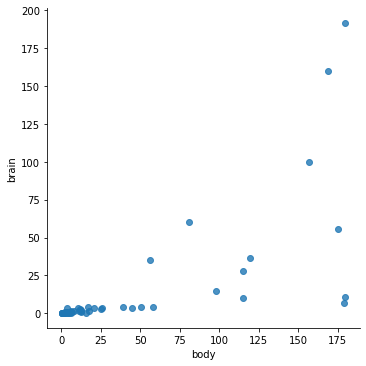

In [5]:
# plot the data
# ci=False      --> Don't show confidence band
# fit_reg=False --> Don't show regression line

sns.lmplot(x = 'body', y = 'brain', 
           data = mammals, ci = False, fit_reg = False);

### Let's Avenger's Infinity War our dataset

In [6]:
# Randomly assign every observation to either universe 1 or universe 2.

np.random.seed(12345)
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


### How are Bias and Variance here?

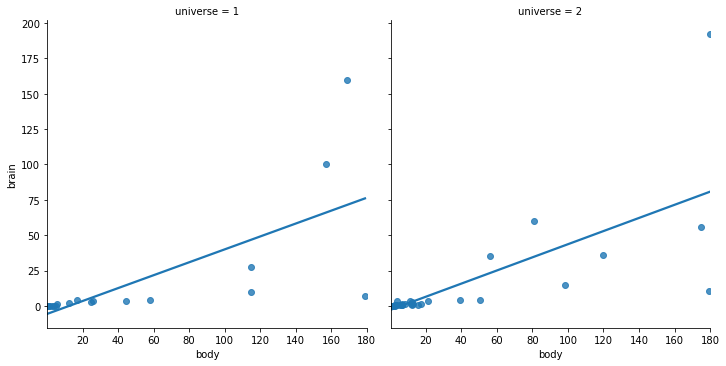

In [7]:
# Two plots based on universe
sns.lmplot(x = 'body', y = 'brain', data = mammals, 
           col = 'universe', ci = False);

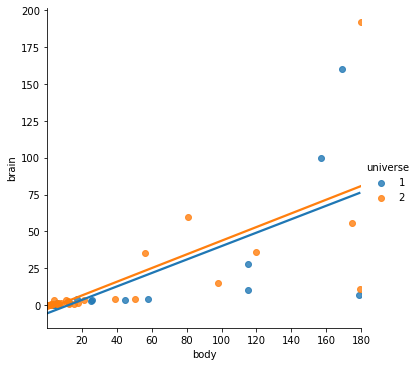

In [9]:
# Also try hue='universe'
sns.lmplot(x = 'body', y = 'brain', data = mammals, 
           hue = 'universe', ci = False);

### Let's DO IT LIVE!
Let's play with the `order=k` parameter and find a good bias-var tradeoff.

C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Andrew\Anaconda3\envs\dsi\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.ap

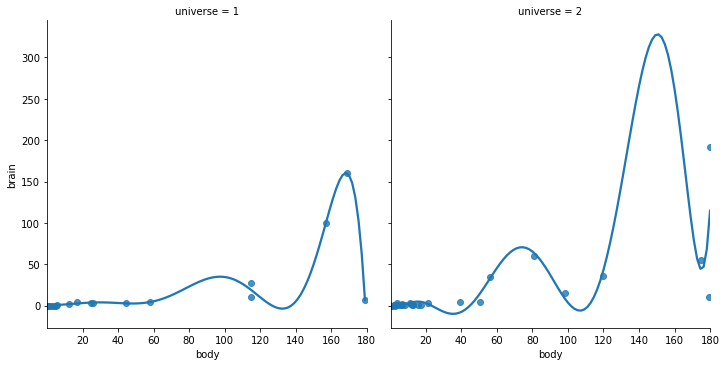

In [10]:
# The warning is informing us we will get a better fit using a smaller order.

sns.lmplot(x = 'body', y = 'brain', data = mammals,
           col = 'universe', ci = False, order = 8);
# plt.ylim(-10, 210)

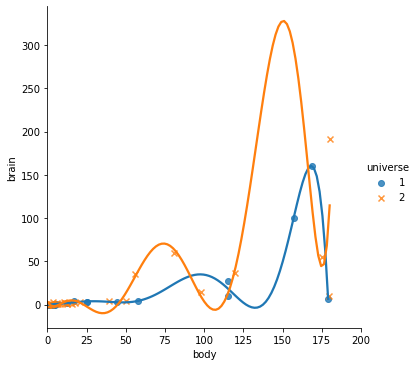

In [17]:
import warnings
warnings.simplefilter('ignore')

sns.lmplot(
    x = 'body',
    y = 'brain',
    data = mammals,
    hue = 'universe',
    ci = False,
    fit_reg=True,
    markers = ["o", "x"],
    order = 8)

plt.xlim(0, 200);

What's going on with all these warnings?

We get a Rank Warning here. Under the hood, to solve for coefficients that minimize the SSE, we are [inverting a matrix](https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/). This happens when "the [rank](https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/real-euclidean-vector-spaces/the-rank-of-a-matrix) of the coefficient matrix in the least-squares fit is deficient" ([numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)).

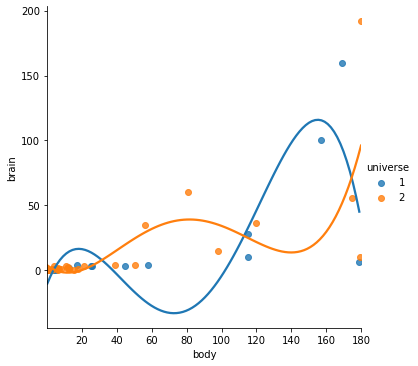

In [18]:
sns.lmplot(x = 'body', y = 'brain', data = mammals,
           hue = 'universe', ci = False, order = 4);

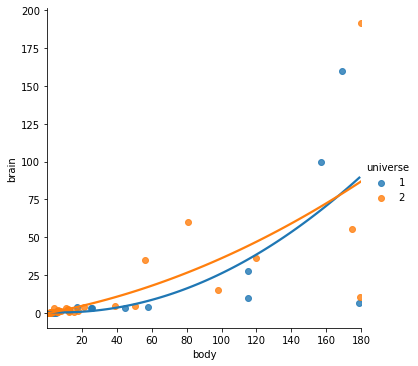

In [19]:
sns.lmplot(x = 'body', y = 'brain', data = mammals,
           hue = 'universe', ci = False, order = 2);

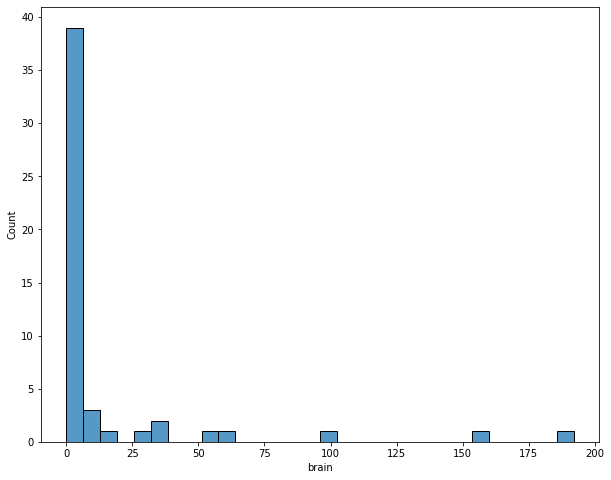

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(mammals['brain'], bins=30);

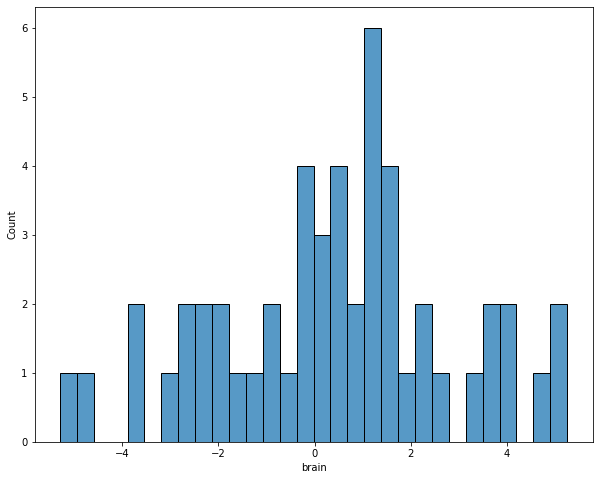

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(np.log(mammals['brain']), bins=30);

In [22]:
# allometry - the study of the relationships and ratios of animal body sizes
# exponential
# logs!
mammals_old.shape

(64, 2)

In [23]:
# natural log of the brain column
mammals_old['log_brain'] = np.log(mammals_old['brain'])

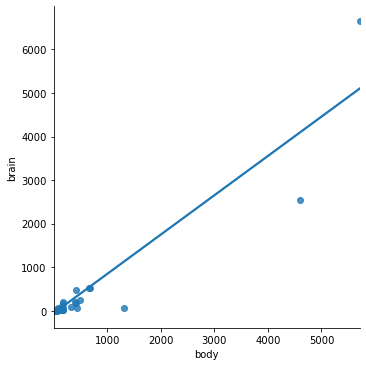

In [24]:
sns.lmplot(x = 'body', y = 'brain', data = mammals_old,
           ci = False);

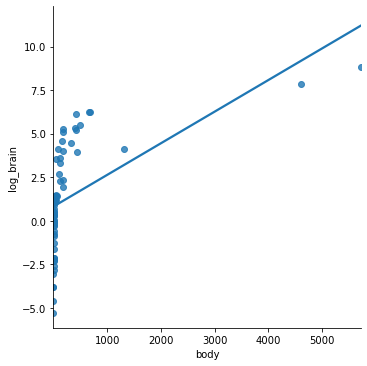

In [25]:
sns.lmplot(x = 'body', y = 'log_brain', data = mammals_old,
           ci = False);

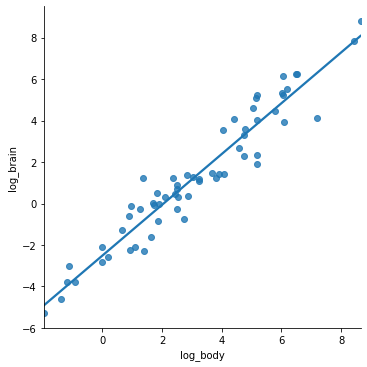

In [26]:
# natural log of the body column
mammals_old['log_body'] = np.log(mammals_old['body'])

sns.lmplot(x = 'log_body', y = 'log_brain', data = mammals_old,
           ci = False);